In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Scatter Plot

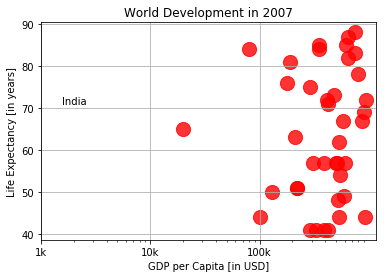

In [10]:
# define all the data...
# gdp for countries, used as x-axis
gdp_cap = np.random.randint(1, 100, size=40) * 1e4
# life exp for countries, used as y-axis
life_exp = np.random.randint(40, 90, size=40)
            
pop = [100] # pop is list with the population size for each country in gdp_cap, life_exp
col = ['r'] # col is list of colors, one for each country in gdp_cap, life_exp

# Basic scatter plot, log scale
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha=0.8)

plt.xscale('log') # to better show the data
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])  # customize x labels

# Additional customizations
plt.text(1550, 71, 'India')
plt.grid()

# After customizing, display the plot
plt.show()

### Example of multiple Y axis

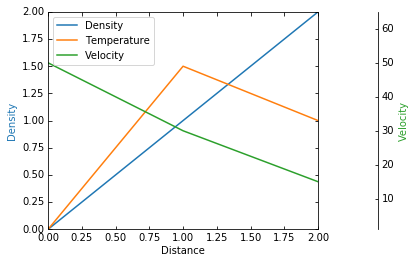

In [11]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(0, 2)
host.set_ylim(0, 2)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()

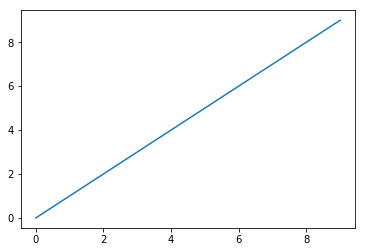

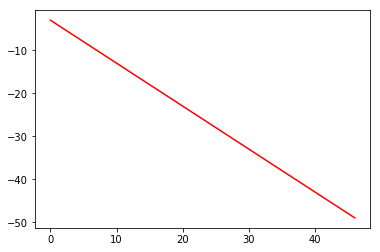

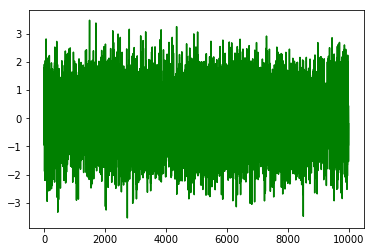

In [12]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

def multipage(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()
    
#First create some figures,

import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
plt.plot(np.arange(10))

fig2 = plt.figure()
plt.plot(-np.arange(3, 50), 'r-')

#By default multipage will print all of the open figures,

multipage('multipage.pdf')

'''
The only gotcha here is that all figures are rendered as vector (pdf) graphics. 
If you want your figure to utilize raster graphics (i.e. if the files are too large as vectors), 
you could use the rasterized=True option when plotting quantities with many points. 
In that case the dpi option that I included might be useful, for example:
'''
fig3 = plt.figure()
plt.plot(np.random.randn(10000), 'g-', rasterized=True)

multipage('multipage_w_raster.pdf', [fig2, fig3], dpi=250)


In [13]:
# d = Pandas Dataframe, 
# ys = [ [cols in the same y], [cols in the same y], [cols in the same y], .. ] 
def chart(d,ys):

    from itertools import cycle
    fig, ax = plt.subplots()

    axes = [ax]
    for y in ys[1:]:
        # Twin the x-axis twice to make independent y-axes.
        axes.append(ax.twinx())

    extra_ys =  len(axes[2:])

    # Make some space on the right side for the extra y-axes.
    if extra_ys>0:
        temp = 0.85
        if extra_ys<=2:
            temp = 0.75
        elif extra_ys<=4:
            temp = 0.6
        if extra_ys>5:
            print ('you are being ridiculous')
        fig.subplots_adjust(right=temp)
        right_additive = (0.98-temp)/float(extra_ys)
    # Move the last y-axis spine over to the right by x% of the width of the axes
    i = 1.
    for ax in axes[2:]:
        ax.spines['right'].set_position(('axes', 1.+right_additive*i))
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        ax.yaxis.set_major_formatter(matplotlib.ticker.OldScalarFormatter())
        i +=1.
    # To make the border of the right-most axis visible, we need to turn the frame
    # on. This hides the other plots, however, so we need to turn its fill off.

    cols = []
    lines = []
    line_styles = cycle(['-','-','-', '--', '-.', ':', '.', ',', 'o', 'v', '^', '<', '>',
               '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_'])
    colors = cycle(matplotlib.rcParams['axes.color_cycle'])
    for ax,y in zip(axes,ys):
        ls=line_styles.next()
        if len(y)==1:
            col = y[0]
            cols.append(col)
            color = colors.next()
            lines.append(ax.plot(d[col],linestyle =ls,label = col,color=color))
            ax.set_ylabel(col,color=color)
            #ax.tick_params(axis='y', colors=color)
            ax.spines['right'].set_color(color)
        else:
            for col in y:
                color = colors.next()
                lines.append(ax.plot(d[col],linestyle =ls,label = col,color=color))
                cols.append(col)
            ax.set_ylabel(', '.join(y))
            #ax.tick_params(axis='y')
    axes[0].set_xlabel(d.index.name)
    lns = lines[0]
    for l in lines[1:]:
        lns +=l
    labs = [l.get_label() for l in lns]
    axes[0].legend(lns, labs, loc=0)

    plt.show()

### Dimension Lines

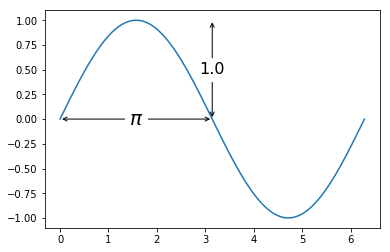

In [14]:
def annotate_dim(ax,xyfrom,xyto,text=None, fontsize=16,bg_color='white'):
    if text is None:
        text = str(np.sqrt( (xyfrom[0]-xyto[0])**2 + (xyfrom[1]-xyto[1])**2 ))
    ax.annotate("",xyfrom,xyto,arrowprops=dict(arrowstyle='<->'))
    if abs(xyto[1] - xyfrom[1]) > 0:
        ax.text((xyto[0]+xyfrom[0])/2,((xyto[1]+xyfrom[1])/2),text,fontsize=fontsize,ha='center',va='center', backgroundcolor=bg_color)
    else:
        ax.text((xyto[0]+xyfrom[0])/2,((xyto[1]+xyfrom[1])/2),text,fontsize=fontsize,ha='center',va='center', backgroundcolor=bg_color)

x = np.linspace(0,2*np.pi,100)
plt.plot(x,np.sin(x))
annotate_dim(plt.gca(),[0,0],[np.pi,0],'$\pi$', 20)
annotate_dim(plt.gca(),[np.pi,1],[np.pi,0],'1.0')


### Shapes (PatchCollection)

In [15]:
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from math import pi

[[0.72154473 0.29536398]
 [0.16094588 0.20612551]
 [0.13432539 0.48060502]]
[[0.     0.05  ]
 [0.     0.1   ]
 [0.1    0.1   ]
 [0.12   0.09  ]
 [0.12   0.06  ]
 [0.0965 0.05  ]]


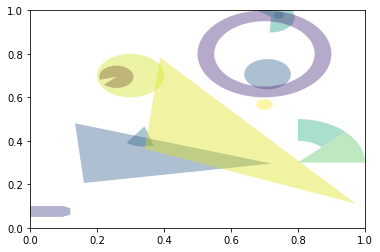

In [16]:
# Fixing random state for reproducibility
np.random.seed(19680801)

patches = []

fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

#Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(1):
    p = np.random.rand(N, 2)
    print(p)
    polygon = Polygon(p, True)
    patches.append(polygon)

polygon = Polygon(np.random.rand(N, 2), True)
patches.append(polygon)
    
pts = [[0,0.05], [0,0.10], [0.10,0.10], [0.12,0.09], [0.12, 0.06], [(0.12-0.0235), 0.05]]
pts_np = np.array(pts)
print(pts_np)
polygon = Polygon(pts_np, closed=True)
patches.append(polygon)
    
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
#fig.colorbar(p, ax=ax)

plt.show()

In [17]:
from trianglesolver import solve, degree  #pip install trianglesolver

def createWaferSS_StackImage(d, dia_ss, offset_w):
    patches = []
    thickness_f = 0.05
    edge_exc = 3.0
    bevel_deg = 3.0
    plot_extents_x = (293,302.5)
    fluid_travel_dist = 0.25

    #wafer:
    bg_color_w = 'xkcd:silver'
    thickness_w = 0.75
    dia_w = 300
    bottom_w = 0
    taper_w = 0.5 # thickness_w/10.0
    extent_w = dia_w+offset_w
    height_w = thickness_w
    bevel_height = thickness_w/10.0
    pts_w = [[0,bottom_w], [(extent_w-taper_w), bottom_w], [extent_w,bevel_height], [extent_w,(thickness_w-bevel_height)], [(extent_w-taper_w), height_w], [0,height_w]]
    patches.append(Polygon(np.array(pts_w), closed=True, color=bg_color_w, alpha=1.0))

    edge_exc_loc = extent_w-edge_exc

    #superstrate:
    bg_color_ss = 'xkcd:sky blue'
    thickness_ss = 0.7
    offset_ss = 0.0
    bottom_ss = height_w + thickness_f
    extent_ss = dia_ss
    a,b,c,A,B,C = solve(b=d, A=bevel_deg*degree, B=(90-bevel_deg)*degree)
    bevel_height_ss=a
    bevel_start_ss = (extent_ss-d)
    height_ss = bottom_ss + thickness_ss
    taper_s = thickness_ss/10.0
    pts_ss = [[0,bottom_ss], [bevel_start_ss, bottom_ss], [(extent_ss), (bottom_ss+bevel_height_ss)], [extent_ss,(height_ss-taper_s)], [(extent_ss-taper_s), height_ss], [0,height_ss] ]
    patches.append(Polygon(np.array(pts_ss), closed=True, color=bg_color_ss, alpha=1.0))

    #drops
    bg_color_d = "cyan"
    y = height_w
    radii = thickness_f
    theta1 = 0
    theta2 = 180
    for x in [plot_extents_x[0]+(x*thickness_f*2) for x in range(100)]:
        if x > edge_exc_loc-radii:
            break
        wedge = Wedge((x, y), radii, theta1, theta2, color=bg_color_d, alpha=0.9)
        patches.append(wedge)

    #fluid:
    bg_color_f = "red"
    transition_f = 0.25         
    height_f = height_w + thickness_f
    extent_f = edge_exc_loc + fluid_travel_dist
    pts_f = [[0,height_w], [extent_f, height_w], [(extent_f-transition_f), (height_f)], [0,(height_f)] ]
    patches.append(Polygon(np.array(pts_f), closed=True, color=bg_color_f, alpha=0.7))

    #colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches,  match_original=True) #alpha=0.5,
    #p.set_array(np.array(colors))

    figsize=(15, 10)
    fontsize=20*(figsize[1]/10)
    text_x, text_y, pitch_y = plot_extents_x[0]+0.3, height_ss-(0.1*(figsize[1]/10)), (0.1*(figsize[1]/10))
    # print(f"pitch_y: {pitch_y}, figsize[1]: {figsize[1]}")
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.add_collection(p)
    ax.set_xlim(plot_extents_x)
    ylim = (-0.1, height_ss+0.5)
    ax.set_ylim(ylim[0], ylim[1])

    ax.vlines(edge_exc_loc, 0, (bottom_ss+(0.8*thickness_ss)), linestyles="--")
    ax.vlines(bevel_start_ss, bottom_ss, (bottom_ss+(0.8*thickness_ss)), linestyles="--")
    #ax.text(edge_exc_loc, (height_ss-(0.15*thickness_ss)), f"margin={(bevel_start_ss-edge_exc_loc):.3f}mm", fontsize=fontsize)
    #ax.text(bevel_start_ss+0.1, (height_ss-(0.3*thickness_ss)), f"d={d:.3f}mm", fontsize=fontsize)
    annotate_dim(ax,[edge_exc_loc,(bottom_ss+(0.7*thickness_ss))],[bevel_start_ss,(bottom_ss+(0.7*thickness_ss))],f"{(bevel_start_ss-edge_exc_loc):.3f}mm", bg_color=bg_color_ss)
    annotate_dim(ax,[bevel_start_ss,(bottom_ss+(0.7*thickness_ss))],[extent_ss,(bottom_ss+(0.7*thickness_ss))],f"{d:.3f}mm", bg_color=bg_color_ss)

    if abs(offset_w) > 0: 
        ax.vlines(extent_w, ylim[0], (bottom_w+(0.9*bevel_height)), linestyles="--")
        ax.vlines(extent_w-offset_w, ylim[0], (bottom_w+(0.9*bevel_height)), linestyles="--")
        ax.text(extent_w+0.1, (bottom_w), f"Error: {offset_w:.2f}mm", fontsize=fontsize)
    
    #ax.text((edge_exc_loc+(extent_w-edge_exc_loc)/2.0), (height_w-(0.3*thickness_w)), f"<-- {edge_exc}mm -->", fontsize=fontsize, ha='center')
    annotate_dim(ax,[edge_exc_loc,(height_w-(0.3*thickness_w))],[extent_w,(height_w-(0.3*thickness_w))],f"Edge Exc: {edge_exc}mm", bg_color=bg_color_w)

    ax.hlines(height_ss, extent_ss, plot_extents_x[1], linestyles="--")
    ax.hlines((bottom_ss+bevel_height_ss), extent_ss, plot_extents_x[1], linestyles="--")
    ax.hlines((bottom_ss), extent_ss, plot_extents_x[1], linestyles="--")
    edge_thickness = (height_ss-(bottom_ss+bevel_height_ss))
    #ax.text(extent_ss+0.1, (height_ss-(0.5*edge_thickness)), f"{edge_thickness:.3f}mm", fontsize=fontsize)
    annotate_dim(ax,[extent_ss+0.5,(height_ss)],[extent_ss+0.5,(bottom_ss+bevel_height_ss)],f"{edge_thickness:.3f}mm")
    annotate_dim(ax,[extent_ss+0.5,(bottom_ss+bevel_height_ss)],[extent_ss+0.5,(bottom_ss)],f"{(thickness_ss-edge_thickness):.3f}mm")
    
    annos = []
    annos.append(f"d         = {d:.3f}mm")
    annos.append(f"SS Dia    = {dia_ss}mm")
    annos.append(f"Margin    = {(bevel_start_ss-edge_exc_loc):.3f}mm")
    annos.append(f"Edge Exc  = {edge_exc}mm")
    annos.append(f"Wafer err = {offset_w}mm")
    annos.append(f"Bevel ang = {bevel_deg}deg")
    for i,anno in enumerate(annos):
        ax.text(text_x, (text_y-i*pitch_y), anno, fontsize=fontsize, fontname="Consolas")

    return ax

offset_w = 0.10

if True:
    d = 1.85
    dia_ss = 300
    ax = createWaferSS_StackImage(d, dia_ss, offset_w)

plt.show()

ModuleNotFoundError: No module named 'trianglesolver'